In [1]:
import sys
import pandas as pd
from data_stabilized_local_speed import StabilizedLocalSpeedSequence
from math_util import *

/Users/zjendex/.conda/envs/vr_clothes/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_path = '/Volumes/ZJ-SSD/EDL_Project/train_dataset_1/a000_1'


In [3]:
'''
self.ts = ts[start_frame:]
self.features = np.concatenate([gyro, linacce], axis=1)[start_frame:]
self.targets = local_v_g[start_frame:, [0, 2]]
self.orientations = quaternion.as_float_array(ori_q)[start_frame:]
self.gt_pos = tango_pos[start_frame:]
self.gravity = gravity[start_frame:]
'''
sequence = StabilizedLocalSpeedSequence(data_path=data_path)


In [4]:
sequence.features.shape

(62341, 6)

In [5]:
gyro_data = sequence.features[:, 0:3]
linacce_data = sequence.features[:, 3:6]

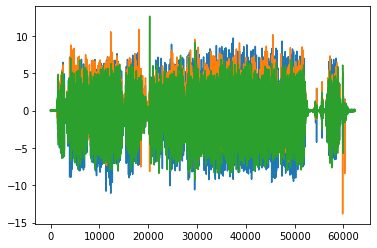

In [10]:
import matplotlib.pyplot as plt
data = linacce_data
plt.plot(data[:, 1])
plt.plot(data[:, 2])
plt.plot(data[:, 0])
plt.show()


In [22]:
# Feature Extraction 1
# Sliding window of IMU Data
data = linacce_data
window_size = 256  
overlap = 128
windowed_data = np.array([data[start:start+window_size] for start in range(0, data.shape[0] - window_size + 1, overlap)])

In [23]:
windowed_data.shape


(486, 256, 3)

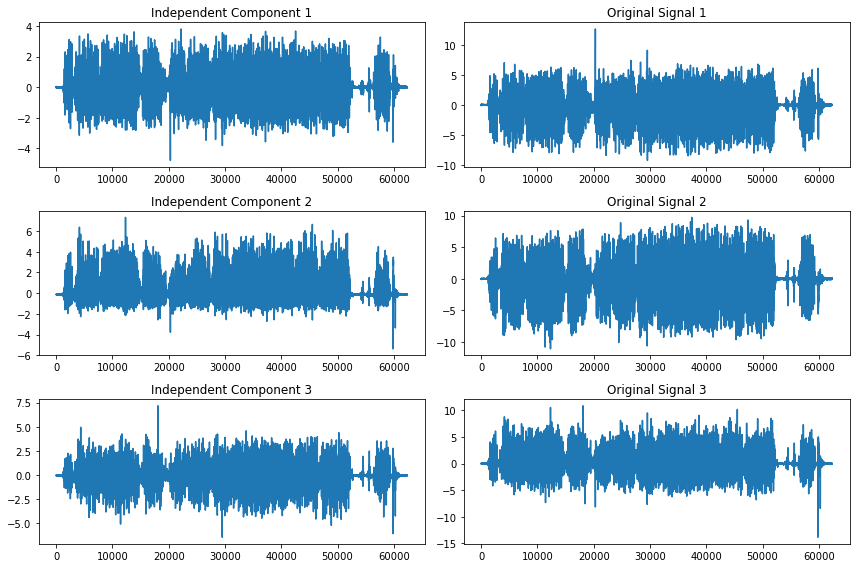

In [35]:
# Feature Extraction 2
# ICA
from sklearn.decomposition import FastICA

data = linacce_data
ica = FastICA(n_components=3, random_state=0)  

# Fit the model to data
S = ica.fit_transform(data)  # Reconstruct signals
A = ica.mixing_

plt.figure(figsize=(12, 8))
for i in range(S.shape[1]):  # S.shape[1] should be the number of components
    plt.subplot(S.shape[1], 2, 2*i + 1) 
    plt.plot(S[:, i])
    plt.title(f'Independent Component {i+1}')
    plt.subplot(S.shape[1], 2, 2*i + 2) 
    plt.plot(data[:, i])
    plt.title(f'Original Signal {i+1}')
plt.tight_layout()
plt.show()


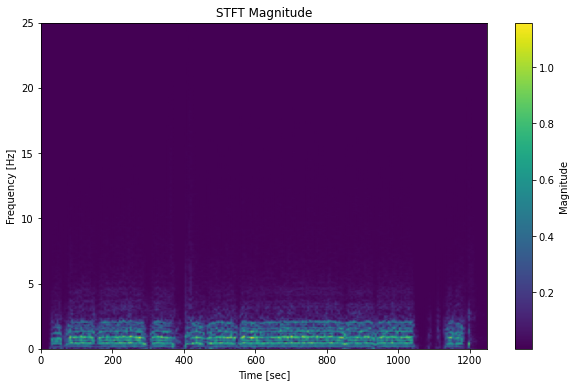

In [39]:
# Feature Extraction 3
# Steven Eyobu and Han, “Feature Representation and Data Augmentation for Human Activity Classification Based on Wearable IMU Sensor Data Using a Deep LSTM Neural Network.”
# STFT Spectrum
from scipy.signal import stft

data = linacce_data[:, 0]
fs = 50  # Sampling frequency
window = 'hamming'  # Window type
nperseg = 512  # Number of points in each segment of the window
noverlap = nperseg // 2  # Overlap between windows

frequencies, times, Zxx = stft(data, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)

plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Magnitude')
plt.show()

